In [1]:
from dwave.system.composites import EmbeddingComposite
from dwave.system.samplers import DWaveSampler
import numpy as np
from pyqubo import Spin
import dimod
import neal
import time
import dwave.inspector
import matplotlib.pyplot as plt    
from greedy import SteepestDescentSolver

### Solving Max2SAT with Dwave (ising_model)

In [2]:
#Reading SAT problem (in CNF)
def pedir_problema_SAT(ruta):
    lineas = []
    with open(ruta, "r") as entrada:
        lineas = entrada.readlines()
    return lineas

In [3]:
#Obtaining lines from SAT problem
ruta = "s2v120c1500-5.cnf"
lineas = pedir_problema_SAT(ruta)

In [4]:
#From lines to clauses
def parsear_cnf(lineas):
    #Filter no comments lines
    lineas_clausulas = [linea.strip() for linea in lineas if not linea.startswith('c') and not linea.startswith('p')]

    #Assign each line to a clause
    clausulas = [list(map(int, linea.split()[:-1])) for linea in lineas_clausulas]

    return clausulas

clauses = parsear_cnf(lineas)

In [5]:
#Identify x_n of the SAT problem and creatinc empty h, J
b = int(list(lineas[2].split(" "))[2])
J = {(i, j): 0 for i in range(b) for j in range(i+1, b)}
h = {i: 0 for i in range(b)}

In [6]:
print(b)

120


In [7]:
#Determine the sign of the variable, v={-1,0,1}, and assign values to h, J
for clause in clauses:
    for literal in clause:
        if literal > 0:
            h[np.abs(literal)-1] -= 1/4
        else:
            h[np.abs(literal)-1] += 1/4
    if clause[0]*clause[1] > 0:
        if np.abs(clause[0])>np.abs(clause[1]):
            J[np.abs(clause[1])-1, np.abs(clause[0])-1] += 1/4
        else:
            J[np.abs(clause[0])-1, np.abs(clause[1])-1] += 1/4
    else:
        if np.abs(clause[0])>np.abs(clause[1]):
            J[np.abs(clause[1])-1, np.abs(clause[0])-1] -= 1/4
        else:
            J[np.abs(clause[0])-1, np.abs(clause[1])-1] -= 1/4

print(h) #We can get an idea only with h

{0: 0.75, 1: 1.75, 2: 0.5, 3: 0.75, 4: -1.25, 5: -1.75, 6: 0.0, 7: 0.25, 8: -1.25, 9: 0.75, 10: -0.25, 11: 0.5, 12: 0.5, 13: -1.5, 14: 1.0, 15: -1.0, 16: 0.75, 17: -0.25, 18: -0.25, 19: -1.25, 20: 0.75, 21: 1.5, 22: -0.25, 23: -2.5, 24: -0.5, 25: 0.5, 26: 0.5, 27: -1.25, 28: 2.0, 29: -0.75, 30: -0.5, 31: 1.75, 32: -0.5, 33: -1.0, 34: -1.0, 35: -1.0, 36: 0.5, 37: 0.25, 38: 0.25, 39: 2.25, 40: 0.75, 41: -1.75, 42: -0.75, 43: 0.0, 44: -1.5, 45: 1.25, 46: -0.25, 47: 0.0, 48: 0.25, 49: -1.25, 50: -0.25, 51: 1.75, 52: 2.0, 53: 0.25, 54: -1.25, 55: 0.25, 56: 0.5, 57: 0.75, 58: 0.25, 59: 0.25, 60: 1.5, 61: 1.25, 62: -1.75, 63: -0.25, 64: -0.25, 65: 1.5, 66: -0.75, 67: -1.0, 68: 2.0, 69: -0.25, 70: -0.25, 71: 0.0, 72: -0.5, 73: 1.5, 74: 0.75, 75: 0.75, 76: 1.75, 77: -0.75, 78: 2.0, 79: 0.0, 80: 2.25, 81: 0.5, 82: 0.25, 83: 0.5, 84: -0.5, 85: -1.5, 86: 1.0, 87: -1.0, 88: -0.25, 89: -0.5, 90: 0.5, 91: 1.0, 92: -1.75, 93: 0.25, 94: 1.0, 95: -0.75, 96: 0.75, 97: 0.25, 98: -1.5, 99: -0.5, 100: -1.0,

In [8]:
#Solve with DWave
num_read=100
secure_q = input("Do you really want to use the QPU? (y/n)")
if secure_q == 'y' or secure_q == 'Y':
    sampler = EmbeddingComposite(DWaveSampler(token='DEV-291d80af600d6eb433a8019c579070ba37436e9a'))
    sample_set = sampler.sample_ising(h, J, num_reads=num_read, return_embedding=True)
    print("Using DWaveSampler()")
    print(sample_set)

Do you really want to use the QPU? (y/n) y


Using DWaveSampler()
    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 119 energy num_oc. ...
0  -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -139.0       1 ...
2  -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -138.0       1 ...
1  -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -136.0       1 ...
4  -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -136.0       1 ...
3  -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -135.0       1 ...
5  -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -135.0       1 ...
9  +1 -1 -1 -1 -1 +1 +1 -1 +1 -1 -1 +1 +1 -1 +1 -1 ...  -1 -135.0       1 ...
10 -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -135.0       1 ...
6  +1 -1 -1 -1 -1 +1 +1 -1 +1 -1 -1 +1 -1 -1 +1 +1 ...  -1 -133.0       1 ...
21 -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 -1 +1 -1 ...  -1 -133.0       1 ...
7  -1 -1 -1 -1 -1 +1 -1 -1 +1 -1 -1 +1 +1 -1 +1 -1 ...  -1 -132.0       1 ...
12 +1 -1 -1 -1 -1 +1 +1 -1 +1 -1 -1 +1 -1 -

#### QPU access time (time used by de QPU: configuration and solving)

In [9]:
qpu_access_time = sample_set.info['timing']['qpu_access_time']
#Tiempo usado por la QPU para resolver el problema de forma activa
qpu_sampling_time = sample_set.info['timing']['qpu_sampling_time']
print("Using DWave QPU... QPU access time:", qpu_access_time*10**(-6), "s.", " ; QPU sampling time:", qpu_sampling_time*10**(-6), "s.")

Using DWave QPU... QPU access time: 0.037832769999999995 s.  ; QPU sampling time: 0.02207 s.


#### Count unsatisfied clauses for each assignment and change the format of the results

In [10]:
def count_unsatisfied_clauses(assignment, clauses):
    count = 0
    for clause in clauses:
        for literal in clause:
            if (literal > 0 and assignment[literal - 1] == 1) or (literal < 0 and assignment[-literal - 1] == -1):
                count += 1
                break
    return str(len(clauses)-count)

In [11]:
#Change of the format
def convert_to_format(result):
    return ''.join('1' if result[v] == 1 else '0' for v in result)

In [12]:
#Open file and write solutions
output_file = f"{ruta}.nr.{num_read}.dwave.sol"
with open(output_file, 'w') as output_file:
    #Write solving time
    output_file.write(f"Total time the QPU has spent processing the problem (qpu_access_time): {qpu_access_time*10**(-6)} segundos\n"
    f"Total time the QPU has spent on active resolution (qpu_sampling_time): {qpu_sampling_time*10**(-6)} segundos\n")
    
    #Write results for each assignment
    for assignment in sample_set:
        formatted_result = convert_to_format(assignment)
        unsatisfied = count_unsatisfied_clauses(assignment, clauses)
        output_file.write('o ' + unsatisfied + '\n' + 'v ' + formatted_result + '\n')

print(f'Soluciones guardadas en {output_file}')

Soluciones guardadas en <_io.TextIOWrapper name='s2v120c1500-5.cnf.nr.100.dwave.sol' mode='w' encoding='UTF-8'>


#### Minor Embedding

In [13]:
print("Chain stregnth: ", sample_set.info["embedding_context"]["chain_strength"])
chains = sample_set.info["embedding_context"]["embedding"].values()  
print("Max chain length: ", max(len(chain) for chain in chains))
print("Percentage of samples with >10% breaks is {} and >0 is {}.".format(
      np.count_nonzero(sample_set.record.chain_break_fraction > 0.10)/num_read*100,
      np.count_nonzero(sample_set.record.chain_break_fraction > 0.0)/num_read*100))

Chain stregnth:  1.7413837218334927
Max chain length:  20
Percentage of samples with >10% breaks is 0.0 and >0 is 99.0.


In [14]:
dwave.inspector.show(sample_set)

Serving Inspector on http://127.0.0.1:18000/?problemId=2863aa94-e074-4574-ba95-7af17f51fd15

'http://127.0.0.1:18000/?problemId=2863aa94-e074-4574-ba95-7af17f51fd15'

#### Statistics of the solutions

In [15]:
# Obtener estadísticas de las soluciones
energias = sample_set.data_vectors['energy']  # Lista de energías de las soluciones
ocurrencias = sample_set.data_vectors['num_occurrences']  # Lista de ocurrencias de cada solución

# Calcular estadísticas adicionales si es necesario
media_energias = sum(energias * ocurrencias) / sum(ocurrencias)

# Imprimir estadísticas
print(f'Energías: {energias}')
print(f'Ocurrencias: {ocurrencias}')
print(f'Media de Energías: {media_energias}')

Energías: [-139. -136. -138. -135. -136. -135. -133. -132. -130. -135. -135. -131.
 -132. -131. -131. -129. -130. -126. -132. -128. -128. -133. -129. -132.
 -132. -132. -131. -129. -130. -128. -129. -128. -128. -126. -127. -126.
 -125. -129. -130. -129. -127. -128. -129. -129. -126. -128. -126. -127.
 -127. -123. -128. -123. -126. -126. -126. -131. -130. -125. -127. -125.
 -130. -126. -126. -122. -127. -129. -130. -124. -125. -123. -122. -125.
 -127. -128. -124. -127. -127. -122. -129. -124. -130. -122. -122. -121.
 -125. -120. -119. -121. -121. -121. -119. -122. -127. -122. -126. -115.
 -112. -114. -120. -108.]
Ocurrencias: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Media de Energías: -126.96


#### Post processing

Time for Post-processing: 0.02 s.


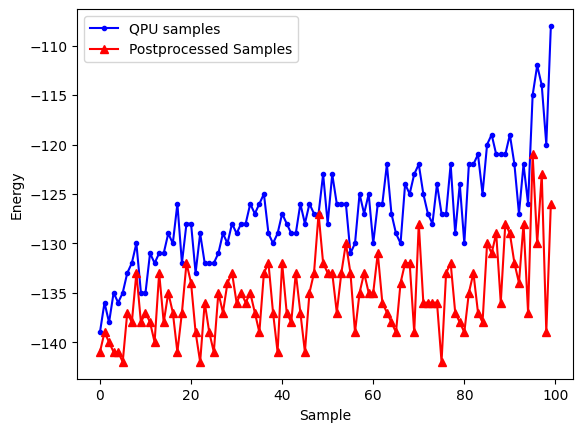

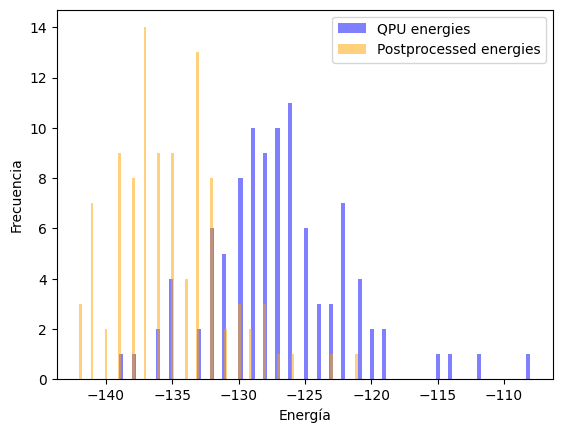

Soluciones guardadas en <_io.TextIOWrapper name='PP.s2v120c1500-5.cnf.nr.100.dwave.sol' mode='w' encoding='UTF-8'>


In [16]:
solver_greedy = SteepestDescentSolver()
start_time = time.time()
sampleset_pp = solver_greedy.sample_ising(h, J, initial_states=sample_set)
end_time = time.time()

print("Time for Post-processing:", round(end_time-start_time, 2), "s.")

plt.plot(list(range(100)), sample_set.record.energy, 'b.-',
                           sampleset_pp.record.energy, 'r^-') 
plt.legend(['QPU samples', 'Postprocessed Samples'])          
plt.xlabel("Sample")    
plt.ylabel("Energy")    
plt.show()

plt.hist(sample_set.record.energy, bins=100, alpha=0.5, color='blue', label='QPU energies')
plt.hist(sampleset_pp.record.energy, bins=100, alpha=0.5, color='orange', label='Postprocessed energies')
plt.xlabel('Energía')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

#Abre el archivo para escribir las soluciones
output_file = f"PP.{ruta}.nr.{num_read}.dwave.sol"
with open(output_file, 'w') as output_file:
    #Escribimos el tiempo que ha tardado en resolver el problema
    output_file.write(f"Total time the QPU has spent processing the problem (qpu_access_time): {qpu_access_time*10**(-6)} segundos\n"
    f"Total time the QPU has spent on active resolution (qpu_sampling_time): {qpu_sampling_time*10**(-6)} segundos\n"
    f"Total time for QPU and Post-processing: {qpu_access_time*10**(-6)+round(end_time-start_time, 2)} segundos\n")
    
    #Recorre los resultados y escribe cada uno en el archivo
    for assignment in sampleset_pp:
        formatted_result = convert_to_format(assignment)
        unsatisfied = count_unsatisfied_clauses(assignment, clauses)
        output_file.write('o ' + unsatisfied + '\n' + 'v ' + formatted_result + '\n')

print(f'Soluciones guardadas en {output_file}')

### Using simulated annealing

In [29]:
ising_model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.Vartype.SPIN)
sampler = neal.SimulatedAnnealingSampler()
start_time = time.time()
response = sampler.sample(ising_model, num_reads=100)
end_time = time.time()

print("Using SimulatedAnnlearingSampler()... Time:", round(end_time-start_time, 2), "s.")

for sample, energy in response.data(['sample', 'energy']):
    formatted_result = convert_to_format(sample)
    unsatisfied = count_unsatisfied_clauses(sample, clauses)
    print(formatted_result, energy, unsatisfied)

Using SimulatedAnnlearingSampler()... Time: 0.82 s.
000001001001001111011001100101100010001000001011111000011011001110000111101001000010000111000011111110001011000101100110 -142.0 233
000001001001001111011001100101100110000000001011010000011011001110000111101001000010000111000011011110001011000101100110 -142.0 233
000001001001001111011001100101100110000000001011010000011011001110000111101001000010000111000011011110001011000101100110 -142.0 233
000001001001001111011001100101100110000000001011110000011011001110000111101001000010000111000011011110001011000101100110 -142.0 233
000001001001001111011001100101100010000000001011111000011011001110000111101001000010000111000011111110001011000101100110 -142.0 233
000001001001001111011001100101100110000000001011011000011011001110000111101001000010000111000011011110001011000101100110 -142.0 233
000001001001001111011001100101100110001000001011111000011011001110000111101001000010000111000011111110001011000101100110 -142.0 233
000001001001001111011001